# Predicting Fraudulent Transaction

# TASK - 
PredCatch Analytics' Australian banking client's profitability and reputation are being hit by fraudulent ATM transactions. They want PredCatch to help them in reducing and if possible completely eliminating such fraudulent transactions. PredCatch believes it can do the same by building a predictive model to catch such fraudulent transactions in real time and decline them. 

Training data contains masked variables pertaining to each transaction id . 

* 1: Fraudulent transactions
* 0: Clean transactions


# Steps:
### 1. Importing Libraries
### 2. Loading the Dataset
### 3. Preprocessing the dataset
### 4. Merging of all datasets into one DataFrame
### 5. Visualization of the data
### 6. Modelling
### 7. Final Modelling with test data

## Importing Libraries

In [80]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Loading the Datasets

In [81]:
#Loading the dataset
train_df   = pd.read_csv('train.csv')
test_df    = pd.read_csv('test_share.csv')
geo_df     = pd.read_csv('Geo_scores.csv')
lambda_df  = pd.read_csv('Lambda_wts.csv')
instant_df = pd.read_csv('instance_scores.csv')
qset_df    = pd.read_csv('Qset_tats.csv')

## Viewing the values of all datasets

In [82]:
print("Train Data Shape :", train_df.shape)
train_df.head()

Train Data Shape : (227845, 28)


,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0


In [83]:
print("Test data Shape : ",test_df.shape)
test_df.head()

Test data Shape :  (56962, 27)


,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200


In [84]:
print("Geo_scores Shape : ", geo_df.shape)
geo_df.head()

Geo_scores Shape :  (1424035, 2)


,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55


In [85]:
print("Lambda_wts Shape : ",lambda_df.shape)
lambda_df.head()

Lambda_wts Shape :  (1400, 2)


,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83


In [86]:
print("Instant_scores Shape : ", instant_df.shape)
instant_df.head()

Instant_scores Shape :  (1424035, 2)


,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84


In [87]:
print("Qset_tats Shape : ", qset_df.shape)
qset_df.head()

Qset_tats Shape :  (1424035, 2)


,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48


### Each dataset has different shape

# Checking the missing value

In [88]:
train_df.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

In [89]:
test_df.isnull().sum()

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
dtype: int64

In [90]:
geo_df.isnull().sum()

id               0
geo_score    71543
dtype: int64

In [91]:
lambda_df.isnull().sum()

Group        0
lambda_wt    0
dtype: int64

In [92]:
instant_df.isnull().sum()

id                 0
instance_scores    0
dtype: int64

In [93]:
qset_df.isnull().sum()

id                           0
qsets_normalized_tat    103201
dtype: int64

#### Geo_scores and Qset_tats have missing value

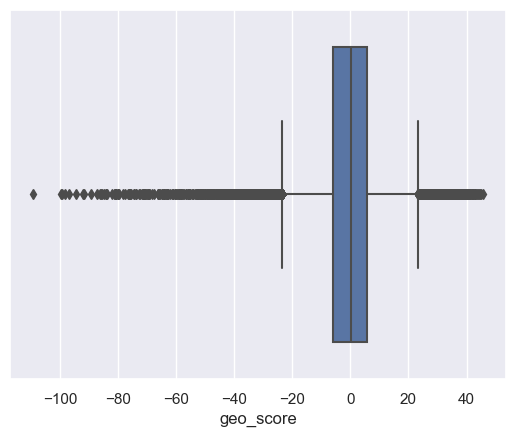

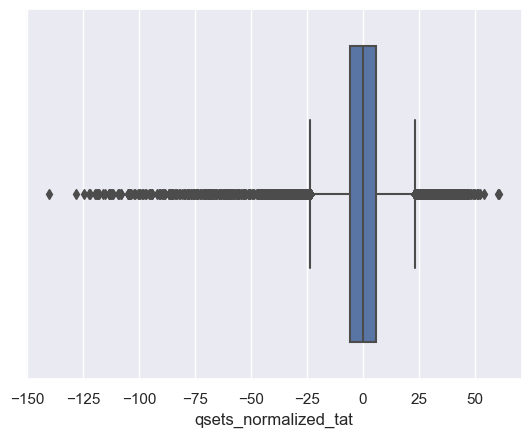

In [94]:
# checking the boxplot of Geo_score and qsets_tats
def boxplots(i):
    sns.boxplot(i)
    
l1 = [geo_df['geo_score'],qset_df['qsets_normalized_tat']]
for i in l1:
    boxplots(i)
    plt.show()

In [95]:
# filling the missing value with the median
geo_df['geo_score'] = geo_df['geo_score'].fillna(geo_df['geo_score'].median())
qset_df['qsets_normalized_tat'] = qset_df['qsets_normalized_tat'].fillna(qset_df['qsets_normalized_tat'].median())

In [96]:
geo_df.isnull().sum()

id           0
geo_score    0
dtype: int64

In [97]:
qset_df.isnull().sum()

id                      0
qsets_normalized_tat    0
dtype: int64

### Checking the duplicates in the Train and test dataset

In [98]:
train_df.duplicated().sum()

0

In [99]:
test_df.duplicated().sum()

0

# Merging all the datasets into one dataset

In [100]:
# unique id in train and test
print("Unique id in Train data : ",train_df['id'].nunique())
print("Unique id in Test data : ",test_df['id'].nunique())

Unique id in Train data :  227845
Unique id in Test data :  56962


In [101]:
train_df['data'] = 'Train'
test_df['data'] = 'Test'

In [102]:
print(train_df.shape)
print(test_df.shape)

(227845, 29)
(56962, 28)


In [103]:
all_data = pd.concat([train_df, test_df], axis=0)
print("all_data shape : ",all_data.shape)
all_data.head()

all_data shape :  (284807, 29)


,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,Train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,Train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,Train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,Train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,Train


In [104]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,Test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,Test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,Test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,Test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,Test


### The datasets Geo_scores, lambda_wts, Qset_tats, instant_scores have multiple values for one id. Hence, taking mean values

In [105]:
geo1 = geo_df.groupby('id').mean()
geo1.head()

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540


In [106]:
qset1 = qset_df.groupby('id').mean()
qset1.head()

,qsets_normalized_tat
id,
0,0.214
1,-0.110
2,1.110
3,-0.676
4,-0.240


In [107]:
instant1 = instant_df.groupby('id').mean()
instant1.head()

,instance_scores
id,
0,0.09
1,-0.17
2,0.21
3,-0.05
4,0.75


In [108]:
lambda1 = lambda_df.groupby('Group').mean()
lambda1.head()

,lambda_wt
Group,
Grp0,-0.31
Grp1,-0.14
Grp10,0.36
Grp100,-0.25
Grp1000,-13.91


In [109]:
all_data = pd.merge(all_data,geo1,on='id',how='left')

In [110]:
all_data = pd.merge(all_data,qset1,on='id',how='left')

In [111]:
all_data = pd.merge(all_data,instant1,on='id',how='left')

In [112]:
all_data = pd.merge(all_data,lambda1,on='Group',how='left')

In [113]:
print(all_data.shape)
all_data.head()

(284807, 33)


,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,geo_score,qsets_normalized_tat,instance_scores,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,Train,0.256,-0.700,-0.06,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,Train,-0.250,0.140,0.52,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,Train,-0.950,-0.430,1.56,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,Train,0.490,-0.302,0.70,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,Train,0.850,-0.630,-0.47,0.60


In [114]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    284807 non-null  int64  
 1   Group                 284807 non-null  object 
 2   Per1                  284807 non-null  float64
 3   Per2                  284807 non-null  float64
 4   Per3                  284807 non-null  float64
 5   Per4                  284807 non-null  float64
 6   Per5                  284807 non-null  float64
 7   Per6                  284807 non-null  float64
 8   Per7                  284807 non-null  float64
 9   Per8                  284807 non-null  float64
 10  Per9                  284807 non-null  float64
 11  Dem1                  284807 non-null  float64
 12  Dem2                  284807 non-null  float64
 13  Dem3                  284807 non-null  float64
 14  Dem4                  284807 non-null  float64
 15  

In [115]:
all_data.describe()

,id,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,geo_score,qsets_normalized_tat,instance_scores,lambda_wt
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,227845.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,142403.000000,0.666669,0.666666,0.666665,0.666666,0.666667,0.666666,0.666667,0.666664,0.666668,...,0.666666,0.666667,0.666666,0.666666,-227.912595,0.001729,0.009034,0.001460,-0.000003,0.000004
std,82216.843396,0.652899,0.550440,0.505418,0.471957,0.460087,0.444089,0.412366,0.398119,0.366207,...,0.173765,0.160745,0.134550,0.110035,62.530027,0.041548,0.999331,0.849345,1.088851,0.958606
min,0.000000,-18.136667,-23.573333,-15.443333,-1.226667,-37.246667,-8.053333,-13.853333,-23.740000,-3.810000,...,-2.766667,-0.200000,-6.856667,-4.476667,-250.000000,0.000000,-18.680000,-25.156000,-24.590000,-19.210000
25%,71201.500000,0.360000,0.466667,0.370000,0.383333,0.436667,0.410000,0.483333,0.596667,0.453333,...,0.560000,0.556667,0.643333,0.650000,-248.600000,0.000000,-0.394000,-0.480000,-0.540000,-0.430000
50%,142403.000000,0.673333,0.690000,0.726667,0.660000,0.650000,0.576667,0.680000,0.673333,0.650000,...,0.673333,0.650000,0.666667,0.670000,-244.500000,0.000000,0.150000,-0.066000,-0.090000,0.050000
75%,213604.500000,1.106667,0.933333,1.010000,0.913333,0.870000,0.800000,0.856667,0.776667,0.866667,...,0.783333,0.746667,0.696667,0.693333,-230.708750,0.000000,0.630000,0.400000,0.450000,0.490000
max,284806.000000,1.483333,8.020000,3.793333,6.293333,12.266667,25.100000,40.863333,7.336667,5.863333,...,3.173333,1.840000,11.203333,11.950000,6172.790000,1.000000,7.850000,9.250000,23.750000,10.530000


# Visualization of data

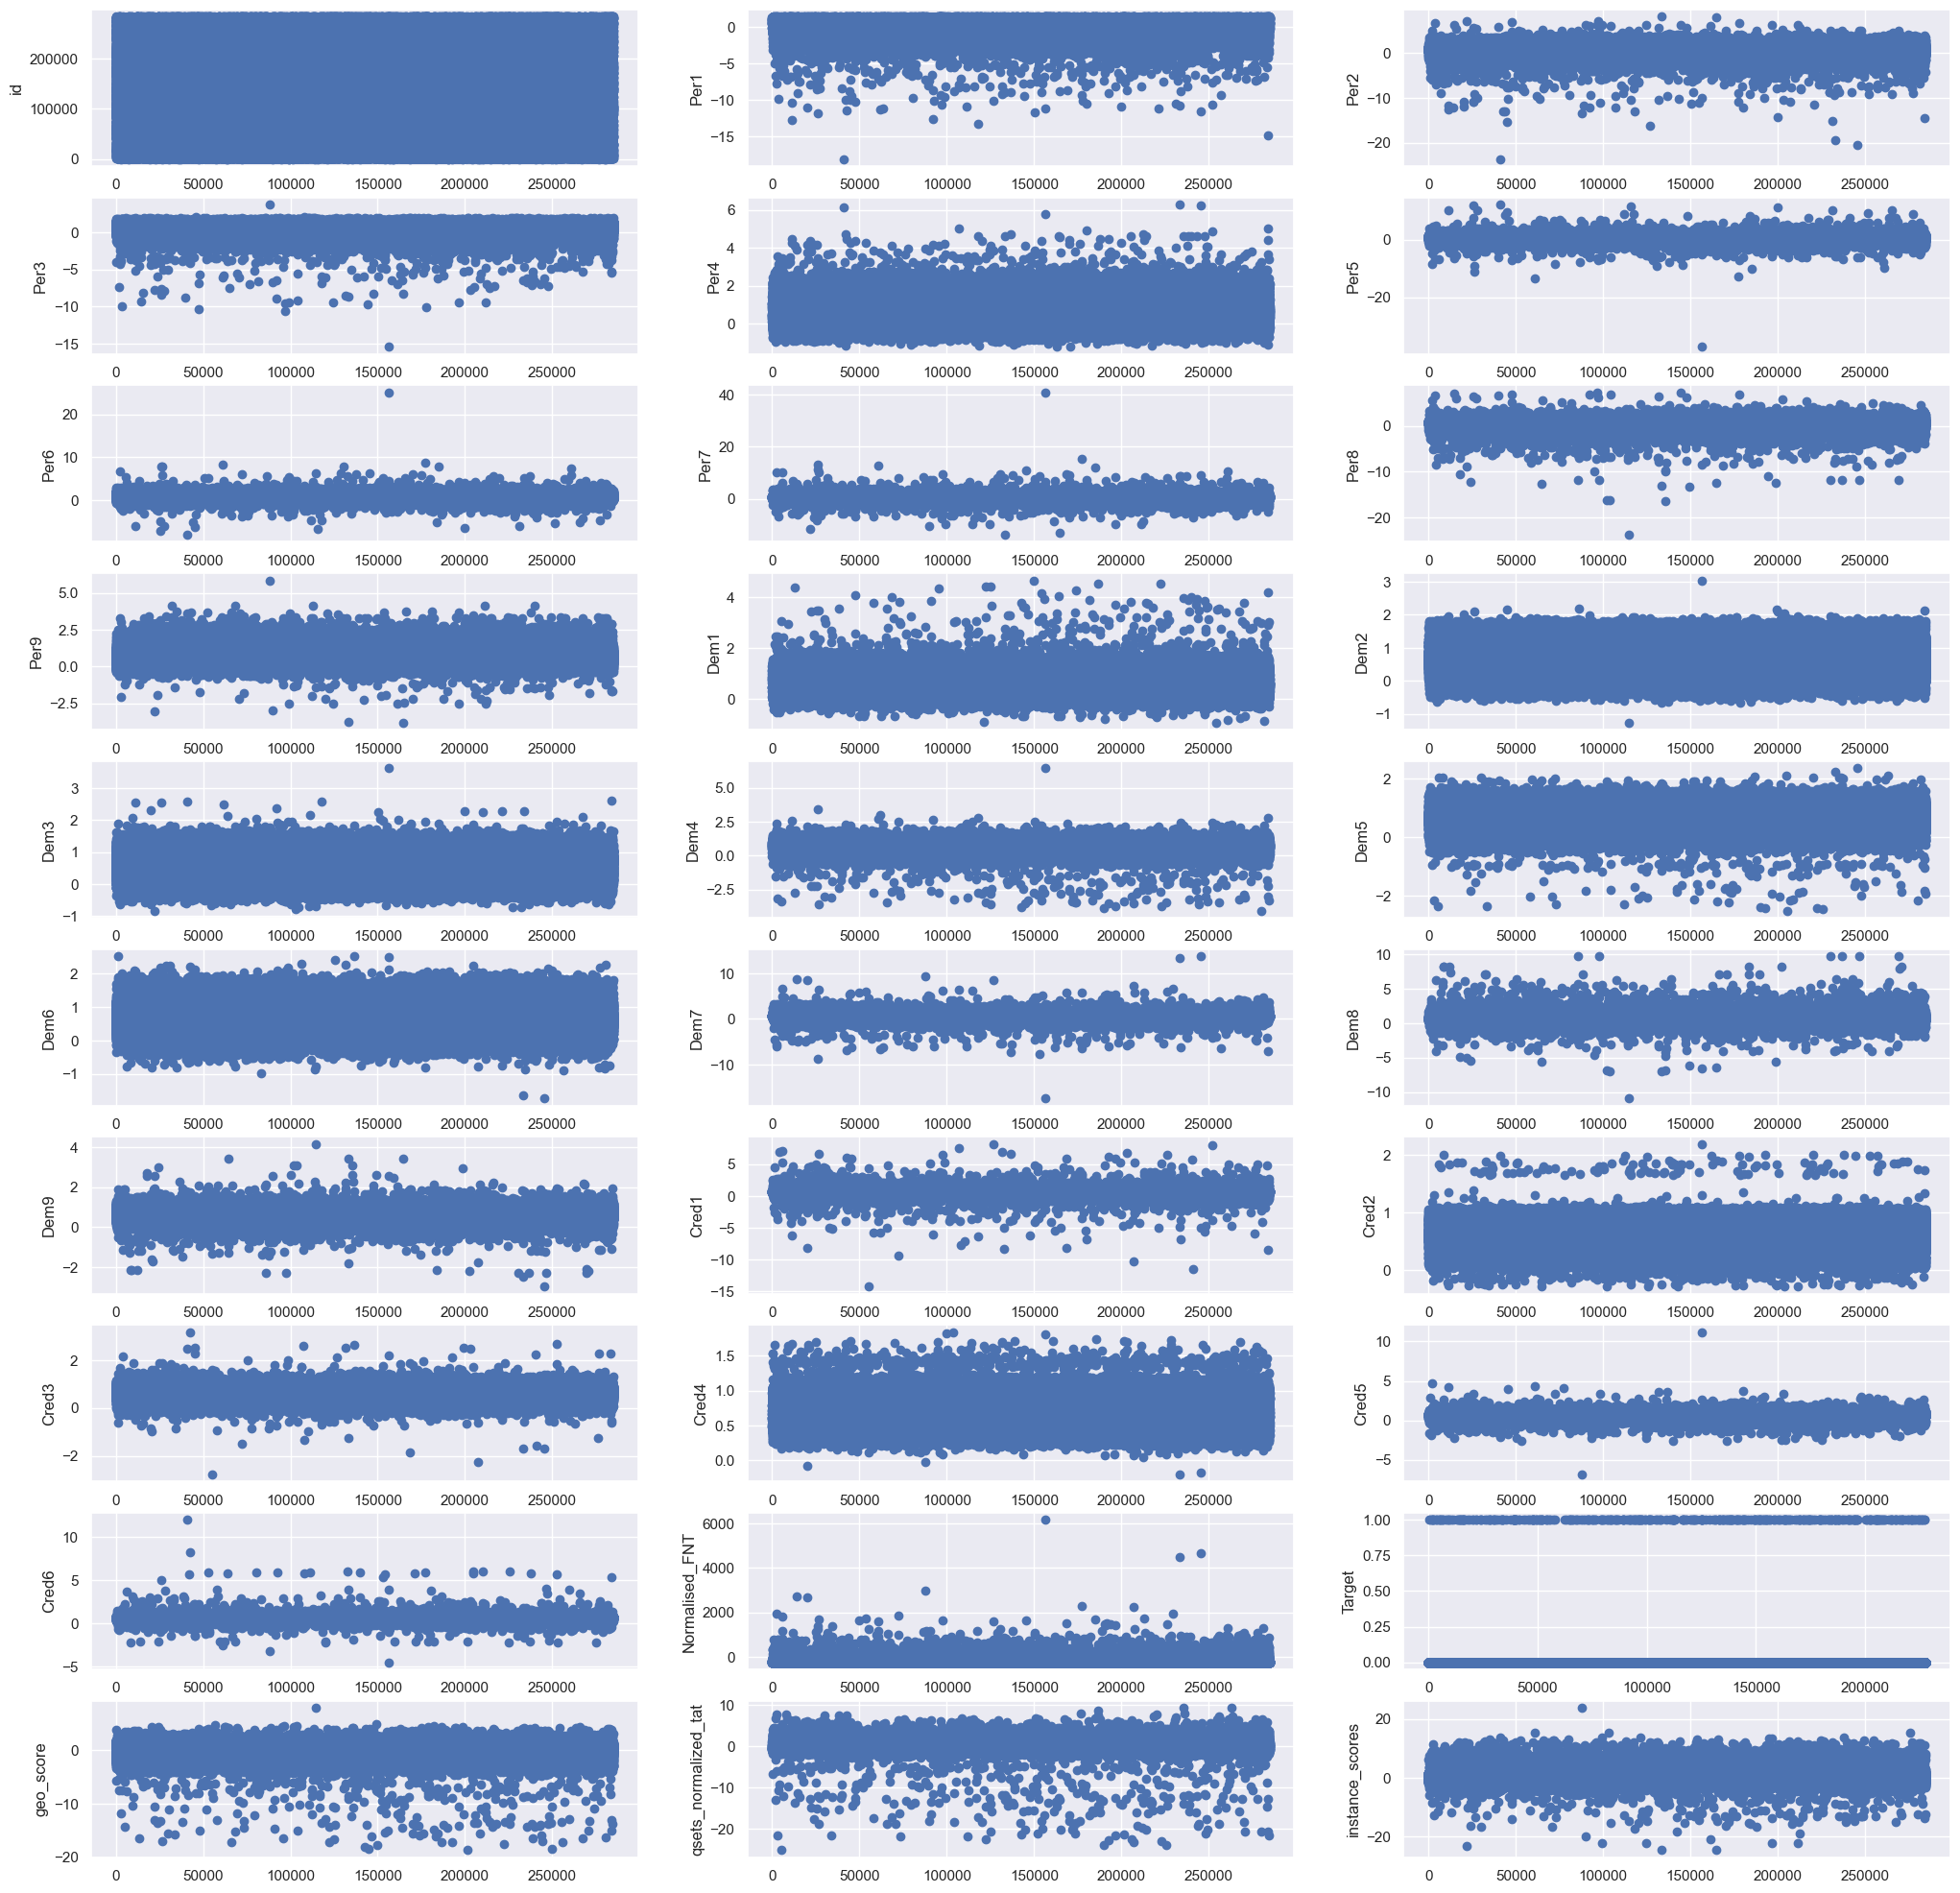

In [116]:
numeric_cols = all_data.select_dtypes(include = np.number) ### selects numeric columns

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 10
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (25,25))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

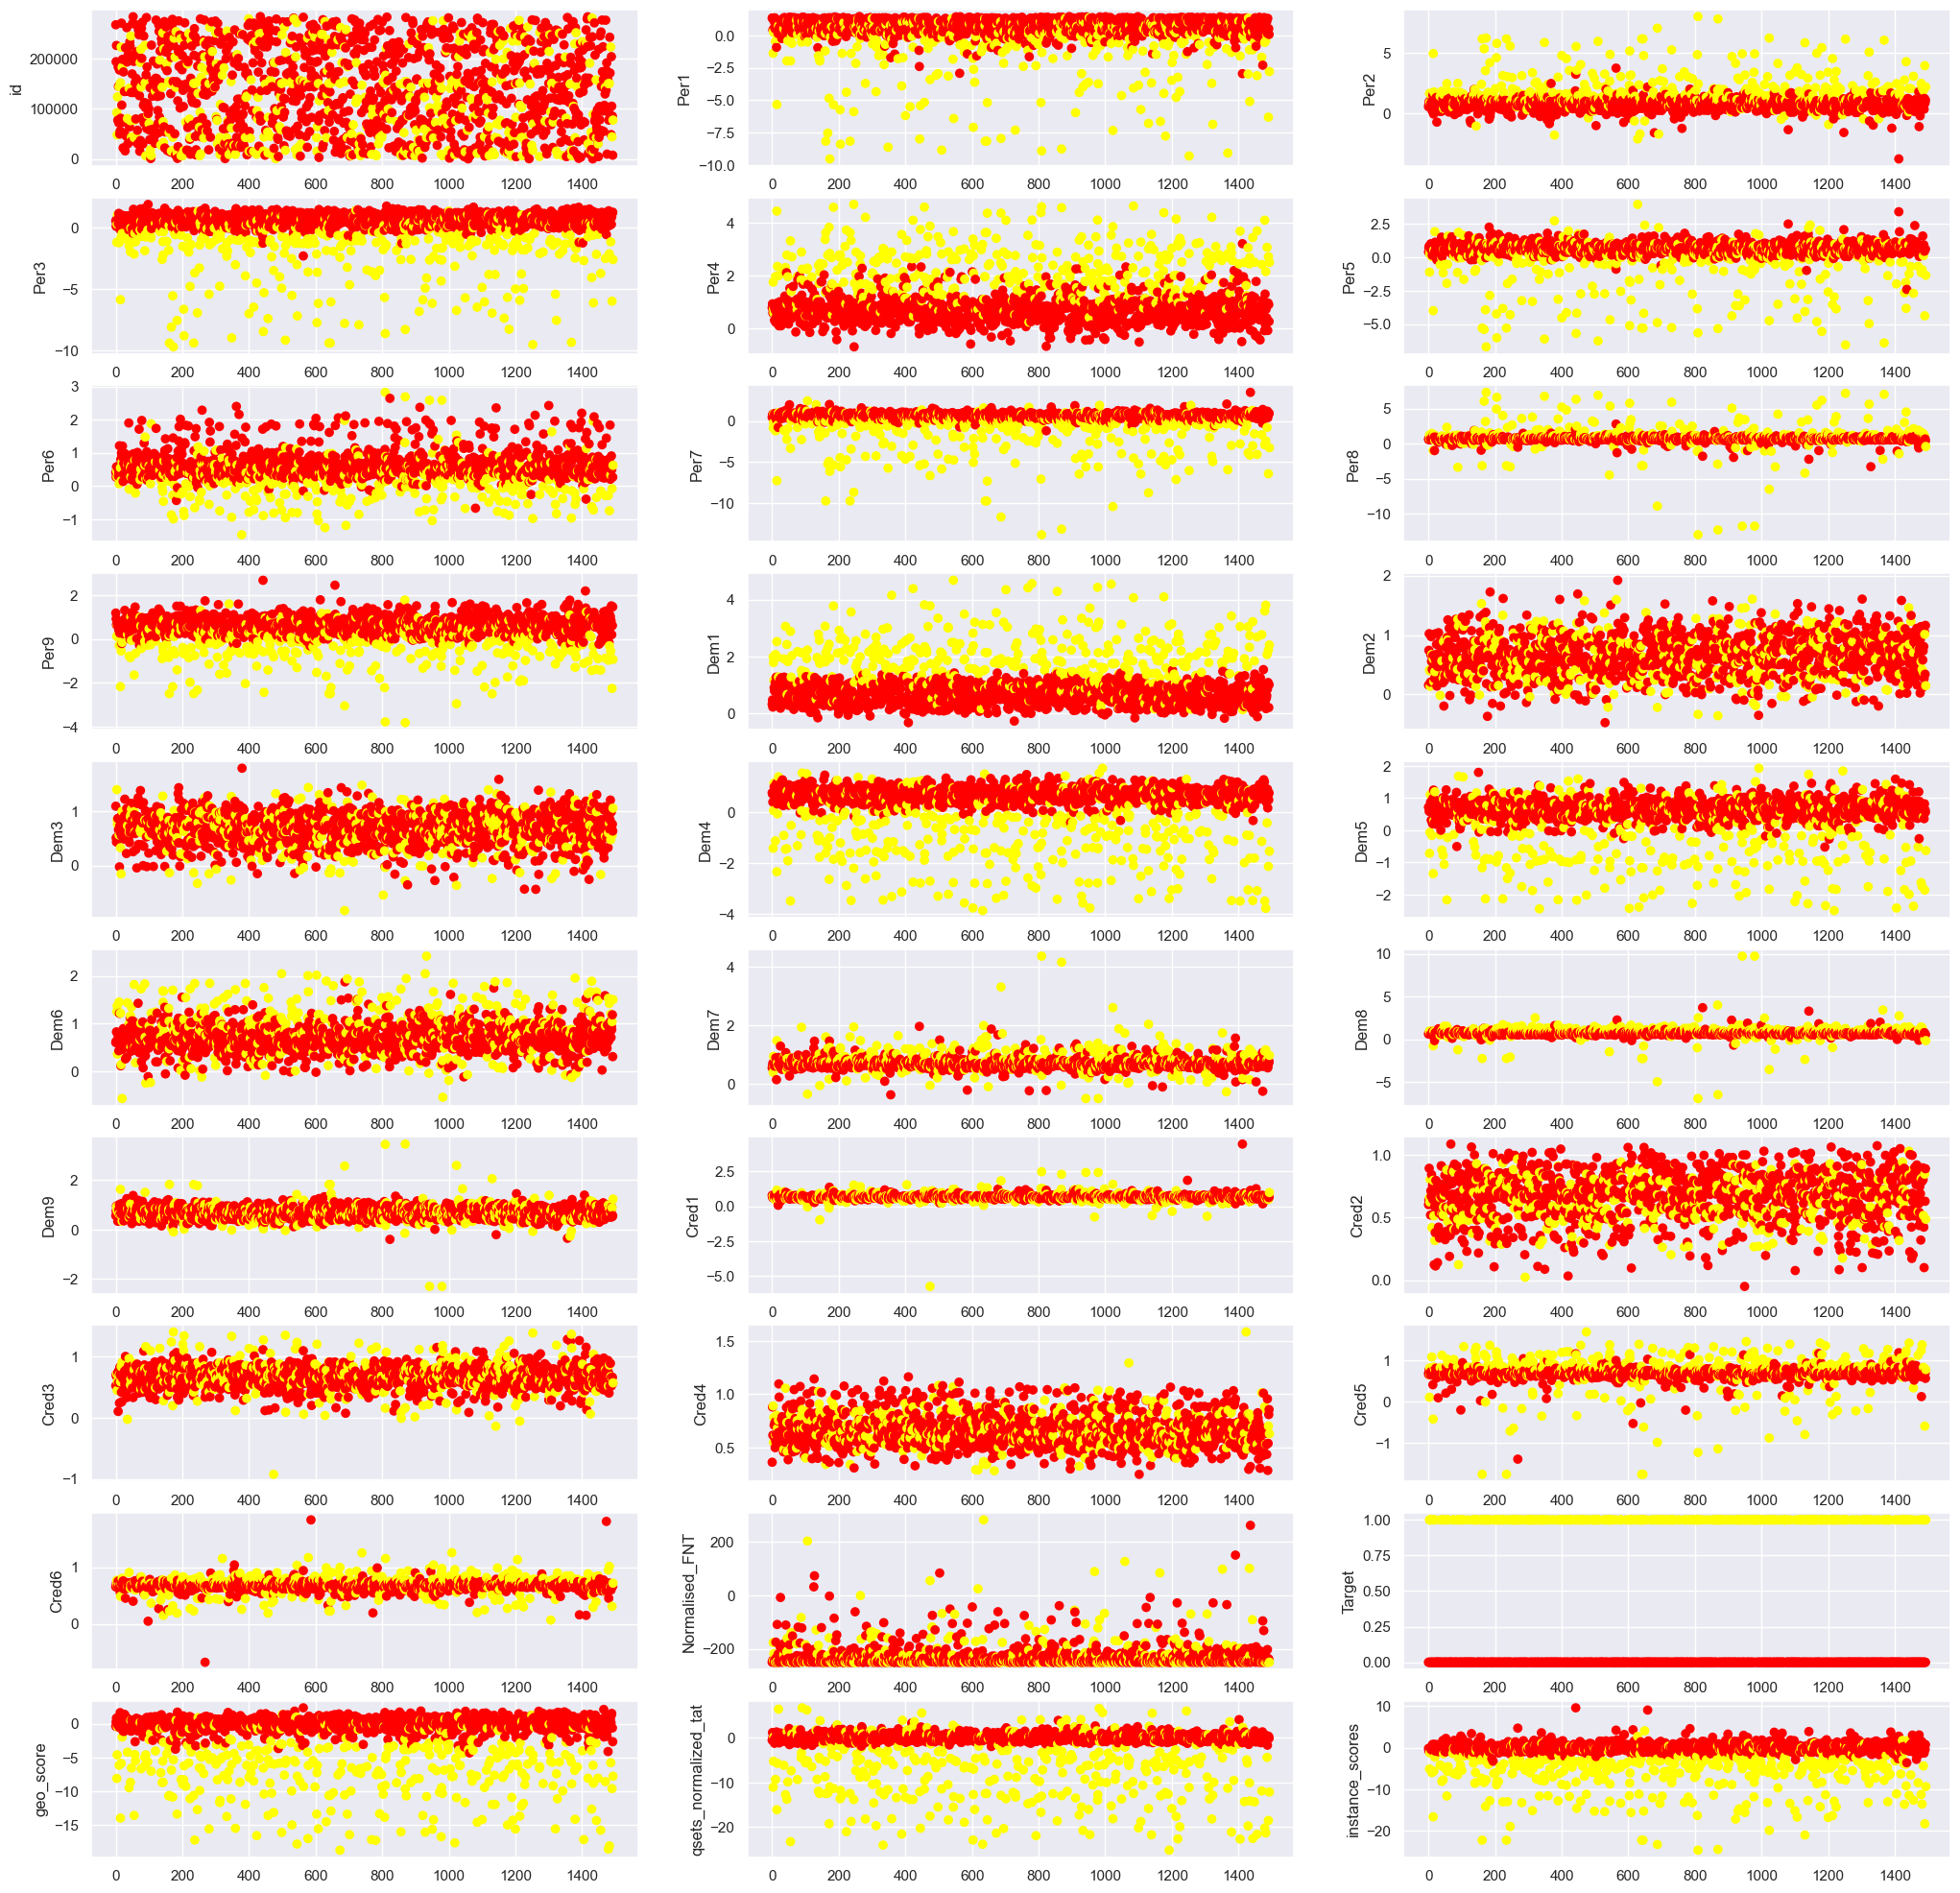

In [117]:
numeric_cols = all_data.select_dtypes(include = np.number) ### selects numeric columns

fraud_trans = numeric_cols.loc[numeric_cols['Target']==1, :]
clean_trans = numeric_cols.loc[numeric_cols['Target']==0,:]


clean_trans_sub = clean_trans.sample(n=1100, replace=False)

new_df = pd.concat([fraud_trans, clean_trans_sub], axis=0) # has a balanced data

new_df = new_df.sample(frac=1)

new_df.reset_index(drop=True, inplace=True)

column_names = list(new_df.columns)

col_index = 0

plot_rows = 10
plot_cols = 3

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (25,25))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = new_df[column_names[col_index]],x=new_df.index, c= new_df['Target'],cmap='autumn')
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

#### We can observe here that in most of the plots there is a threshold value which seperates the red dots(Target 0- Clean Transaction) and yellow dots(Target 1 - Fradulent Transactions). e.g. instant_scores below 0(y-axis) there are only yellow dots.


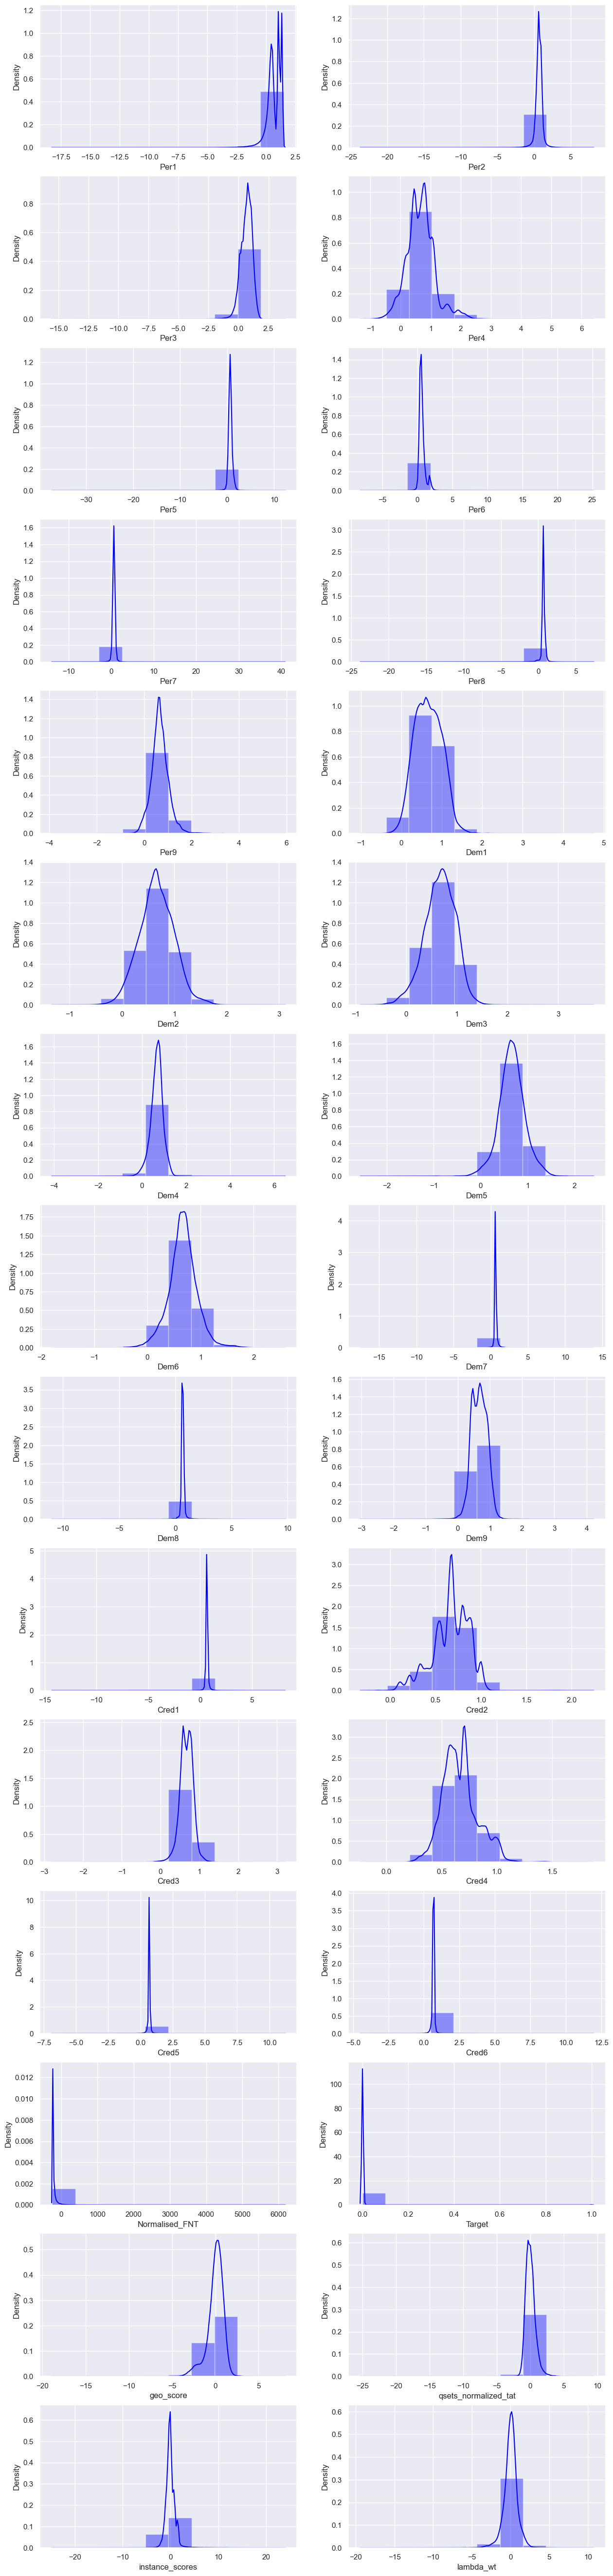

In [118]:
# Distribution of data using distplot
plot_number = 1
plt.figure(figsize = (15,100))
for i in list(all_data.select_dtypes(include = ['float']).columns)[0:]:
    plt.subplot(22,2,plot_number)
    sns.distplot(all_data[i], bins =10, color= 'Blue')
    plot_number+= 1
plt.show()

In [119]:
# object column - Group
all_data['Group'].nunique()

1400

In [120]:
pd.crosstab(index=all_data['Group'], columns=all_data['Target']).transpose()

Group,Grp0,Grp1,Grp10,Grp100,Grp1000,Grp1001,Grp1003,Grp1004,Grp1005,Grp1006,...,Grp989,Grp99,Grp990,Grp991,Grp992,Grp993,Grp994,Grp995,Grp997,Grp998
Target,,,,,,,,,,,,,,,,,,,,,
0.0,1068,1236,1197,1154,0,0,1,0,0,0,...,1,85,0,0,0,0,0,0,0,0
1.0,0,1,0,0,1,1,0,1,1,1,...,0,0,1,1,1,1,1,1,1,1


## Splitting the data into Train and Test

In [121]:
train_data = all_data[all_data['data']=='Train']

In [122]:
test_data = all_data[all_data['data']=='Test']

In [123]:
train_data.drop(['data'], axis=1, inplace=True)
print(train_data.shape)
train_data.head()

(227845, 32)


,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,geo_score,qsets_normalized_tat,instance_scores,lambda_wt
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,0.256,-0.700,-0.06,-0.13
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,-0.250,0.140,0.52,0.66
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,-0.950,-0.430,1.56,-0.51
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,0.490,-0.302,0.70,0.72
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,0.850,-0.630,-0.47,0.60


In [124]:
test_data.drop(['data'], axis=1, inplace=True)
test_data = test_data.dropna(axis=1)
print(test_data.shape)
test_data.head()

(56962, 31)


,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,qsets_normalized_tat,instance_scores,lambda_wt
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.426,-0.04,0.76
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.620,-0.77,0.18
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,-0.406,0.11,0.39
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.374,0.33,1.80
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.130,-0.37,1.89


# Model Building

#### for model building id, Group are not required

In [125]:
train_data = train_data.drop(['id','Group'], axis = 1)

## Checking the balance/imbalance of the dataset

In [126]:
train_data['Target'].value_counts()

0.0    227451
1.0       394
Name: Target, dtype: int64

In [127]:
train_data['Target'].value_counts()/len(train_data)*100

0.0    99.827075
1.0     0.172925
Name: Target, dtype: float64

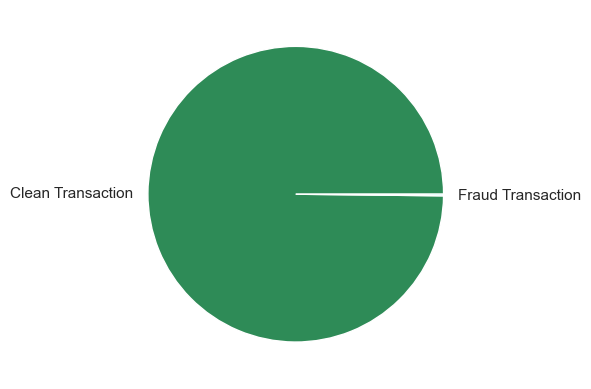

In [128]:
y = all_data['Target'].value_counts()
mylabels = ['Clean Transaction','Fraud Transaction']
plt.pie(y, labels=mylabels, colors = ['seagreen','cyan'])
plt.show()

### This dataset is highly imbalanced

In [129]:
# Data is imbalance, we have to balance it prior building a model
fraud = train_data[train_data['Target']==1]
clean = train_data[train_data['Target']==0]

fraud = fraud.sample(clean.shape[0], replace=True)

print(clean.shape)
print(fraud.shape)

(227451, 30)
(227451, 30)


In [130]:
data = clean.append(fraud, ignore_index = True)
data.shape

(454902, 30)

### Splitting the train data into dependent and independent variable

In [131]:
x = data.drop(['Target'], axis=1)  # independent variables
y = data[['Target']]            # dependent variable

In [132]:
x.head()

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,qsets_normalized_tat,instance_scores,lambda_wt
0,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,0.460000,...,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.256,-0.700,-0.06,-0.13
1,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,0.470000,...,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,-0.250,0.140,0.52,0.66
2,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,0.660000,...,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,-0.950,-0.430,1.56,-0.51
3,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,1.096667,...,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.490,-0.302,0.70,0.72
4,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,0.756667,...,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.850,-0.630,-0.47,0.60


In [133]:
y.head()

,Target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [134]:
print(x.shape,y.shape)

(454902, 29) (454902, 1)


In [135]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [136]:
pd.DataFrame(x_sc, columns = x.columns)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,qsets_normalized_tat,instance_scores,lambda_wt
0,0.631509,-0.550499,0.467894,-0.618402,0.760803,2.725765,0.302315,0.132766,0.805543,-0.905687,...,1.920332,1.132929,-0.441529,0.003261,-0.055866,-0.342263,0.739155,0.437206,0.603214,0.709354
1,0.322063,-0.060660,0.656897,0.006224,0.415840,0.343795,0.535453,-0.014412,-0.048734,-0.894642,...,0.215131,-0.519901,-0.023290,-0.371138,-0.191817,-0.377657,0.627399,0.577086,0.729013,0.880662
2,0.662626,-0.891823,0.686575,-1.224195,-0.024441,0.709805,0.161770,-0.031728,-0.002214,-0.684797,...,-1.419020,0.380301,-0.023290,0.003261,-0.055866,-0.143667,0.472797,0.482167,0.954583,0.626953
3,0.406772,-0.151854,0.594416,-0.455183,0.427188,-0.144218,0.608206,-0.111810,0.327656,-0.202519,...,1.049969,-1.124954,-0.964328,0.452540,0.533258,-0.405618,0.790837,0.503482,0.768054,0.893672
4,0.367010,-0.211781,0.521002,-0.947979,0.447613,0.053311,0.556948,-0.005755,0.365717,-0.578033,...,-0.655233,-0.696990,0.269477,0.059421,-0.055866,-0.371011,0.870347,0.448862,0.514287,0.867651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,-2.685955,2.867952,-2.503051,2.849998,-2.802299,0.210173,-3.467586,-1.144228,-3.038700,1.373165,...,0.783531,-0.387084,0.813188,-3.104250,-1.324747,-0.375140,-2.393981,-2.125613,-2.984220,-0.906141
454898,0.327249,0.095671,0.005538,-0.637235,0.622364,-0.306889,0.418057,0.020218,-0.226355,0.136179,...,0.126318,0.468846,1.315074,0.106221,0.170720,-0.406129,0.309359,0.244037,-0.129889,-0.214405
454899,-0.238051,0.181654,-0.188151,-0.197800,0.109459,-0.562515,-0.054834,0.180383,-0.158690,0.662635,...,-0.744045,-0.387084,1.189603,-0.380498,0.102745,-0.367039,-0.238376,-0.565275,-0.416190,-0.914814
454900,-0.134326,0.223342,0.046151,-0.285687,0.000523,-0.661279,-0.043260,-0.479758,0.467215,0.714176,...,0.303943,-0.180480,0.436772,-0.343058,-1.800577,-0.170802,-0.851045,-0.959272,-0.153748,-1.296461


In [137]:
x_sc.shape

(454902, 29)

### Splitting the data into training and test sets for the model building

In [138]:
#split the data into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x_sc, y, test_size = 0.2, stratify = y, random_state = 42)

## Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

#predictions
train_pred_lr = lr.predict(x_train)
test_pred_lr = lr.predict(x_test)

In [140]:
# Evaluate the metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_train,train_pred_lr))
print()
print(confusion_matrix(y_test,test_pred_lr))

[[177386   4574]
 [ 16267 165694]]

[[44434  1057]
 [ 4119 41371]]


In [141]:
print(classification_report(y_train,train_pred_lr))
print()
print(classification_report(y_test,test_pred_lr))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94    181960
         1.0       0.97      0.91      0.94    181961

    accuracy                           0.94    363921
   macro avg       0.94      0.94      0.94    363921
weighted avg       0.94      0.94      0.94    363921


              precision    recall  f1-score   support

         0.0       0.92      0.98      0.94     45491
         1.0       0.98      0.91      0.94     45490

    accuracy                           0.94     90981
   macro avg       0.95      0.94      0.94     90981
weighted avg       0.95      0.94      0.94     90981



In [142]:
# Lists to store accuracy value
train_accu = [] 
test_accu = []
train_mean = []
test_mean = []

In [143]:
print(accuracy_score(y_train,train_pred_lr))
train_accu.append(accuracy_score(y_train,train_pred_lr))
print()
print(accuracy_score(y_test,test_pred_lr))
test_accu.append(accuracy_score(y_test,test_pred_lr))

0.9427320764671453

0.9431090007803827


In [144]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(lr, x_train, y_train, cv=3)
test_accuracy = cross_val_score(lr, x_test, y_test, cv=3)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [0.94248477 0.94317723 0.94246004]

Train Mean Accuracy 0.9427073458250556

Train Max Accuracy 0.9431772280247637

Test Accuracy [0.94203185 0.94358163 0.94176806]

Test Mean Accuracy 0.9424605137336367

Test Max Accuracy 0.9435816269330959


## Random Forest 

In [145]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_leaf= 1, min_samples_split= 2, random_state=200)
rfr.fit(x_train,y_train)

#predictions
train_pred_rfr = rfr.predict(x_train)
test_pred_rfr = rfr.predict(x_test)

In [146]:
print(confusion_matrix(y_train,train_pred_rfr))
print()
print(confusion_matrix(y_test,test_pred_rfr))

[[181625    335]
 [ 11990 169971]]

[[45400    91]
 [ 3002 42488]]


In [147]:
print(classification_report(y_train,train_pred_rfr))
print()
print(classification_report(y_test,test_pred_rfr))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97    181960
         1.0       1.00      0.93      0.97    181961

    accuracy                           0.97    363921
   macro avg       0.97      0.97      0.97    363921
weighted avg       0.97      0.97      0.97    363921


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     45491
         1.0       1.00      0.93      0.96     45490

    accuracy                           0.97     90981
   macro avg       0.97      0.97      0.97     90981
weighted avg       0.97      0.97      0.97     90981



In [148]:
print(accuracy_score(y_train,train_pred_rfr))
train_accu.append(accuracy_score(y_train,train_pred_rfr))
print()
print(accuracy_score(y_test,test_pred_rfr))
test_accu.append(accuracy_score(y_test,test_pred_rfr))

0.9661327595824368

0.9660038909222805


In [149]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(rfr, x_train, y_train, cv=3)
test_accuracy = cross_val_score(rfr, x_test, y_test, cv=3)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [0.96843546 0.96830356 0.9690867 ]

Train Mean Accuracy 0.9686085716405484

Train Max Accuracy 0.9690866973876199

Test Accuracy [0.96791638 0.97078511 0.97071916]

Test Mean Accuracy 0.9698068827557402

Test Max Accuracy 0.9707851089787978


## XGBOOST 

In [150]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

#predictions
train_pred_xgb = xgb.predict(x_train)
test_pred_xgb = xgb.predict(x_test)

In [151]:
print(confusion_matrix(y_train,train_pred_xgb))
print()
print(confusion_matrix(y_test,test_pred_xgb))

[[181960      0]
 [     0 181961]]

[[45487     4]
 [    0 45490]]


In [152]:
print(classification_report(y_train,train_pred_xgb))
print()
print(classification_report(y_test,test_pred_xgb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181960
         1.0       1.00      1.00      1.00    181961

    accuracy                           1.00    363921
   macro avg       1.00      1.00      1.00    363921
weighted avg       1.00      1.00      1.00    363921


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45491
         1.0       1.00      1.00      1.00     45490

    accuracy                           1.00     90981
   macro avg       1.00      1.00      1.00     90981
weighted avg       1.00      1.00      1.00     90981



In [153]:
print(accuracy_score(y_train,train_pred_xgb))
train_accu.append(accuracy_score(y_train,train_pred_xgb))
print()
print(accuracy_score(y_test,test_pred_xgb))
test_accu.append(accuracy_score(y_test,test_pred_xgb))

1.0

0.9999560347764918


In [154]:
# Cross Validation
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgb, x_train, y_train, cv=3)
test_accuracy = cross_val_score(xgb, x_test, y_test, cv=3)
print("Train Accuracy", training_accuracy)
print()
print("Train Mean Accuracy", training_accuracy.mean())
print()
print("Train Max Accuracy", training_accuracy.max())
print()
print("Test Accuracy", test_accuracy)
print()
print("Test Mean Accuracy", test_accuracy.mean())
print()
print("Test Max Accuracy", test_accuracy.max())
train_mean.append(training_accuracy.mean())
test_mean.append(test_accuracy.mean())

Train Accuracy [0.99989283 0.99985162 0.99988459]

Train Mean Accuracy 0.9998763467895504

Train Max Accuracy 0.9998928338842771

Test Accuracy [0.99973621 0.99967026 0.99970323]

Test Mean Accuracy 0.9997032347413196

Test Max Accuracy 0.9997362086589507


# Finding the best model
 Accuracy Comparison of different algorithms on training data and testing data

In [155]:
algorithm = ['LogisticRegression','RandomForest', 'XGBOOST']
accu_data = {'Training Accuracy':train_accu,'Test Accuracy':test_accu,'Train Mean':train_mean,'Test Mean':test_mean}
model = pd.DataFrame(accu_data, index = algorithm)
model

,Training Accuracy,Test Accuracy,Train Mean,Test Mean
LogisticRegression,0.942732,0.943109,0.942707,0.942461
RandomForest,0.966133,0.966004,0.968609,0.969807
XGBOOST,1.000000,0.999956,0.999876,0.999703


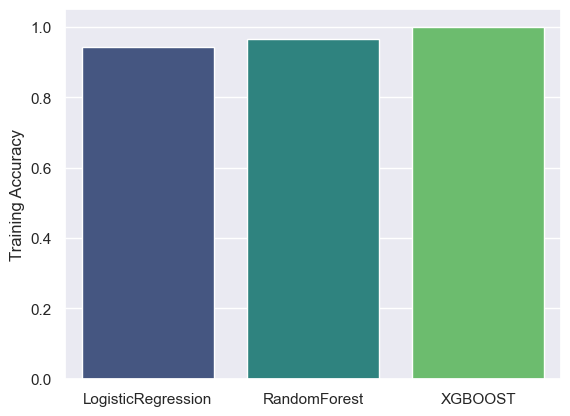

In [157]:
sns.barplot(model.index, model['Training Accuracy'], palette = 'viridis') 
plt.show()

# Final Modelling

### Taking Random Forest as the best model for the predictions of the test set

In [158]:
test_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,qsets_normalized_tat,instance_scores,lambda_wt
227845,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.25,-0.426,-0.04,0.76
227846,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.43,-0.620,-0.77,0.18
227847,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,1.32,-0.406,0.11,0.39
227848,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,-2.11,0.374,0.33,1.80
227849,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,-2.11,-0.130,-0.37,1.89


In [159]:
test_data = test_data.drop(['id','Group'], axis=1)

In [160]:
test_data.shape

(56962, 29)

In [161]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
test_sc = scaler.fit_transform(test_data)

In [162]:
pd.DataFrame(test_sc, columns =test_data.columns)

,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,Dem1,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,geo_score,qsets_normalized_tat,instance_scores,lambda_wt
0,-1.496031,1.570058,-0.893190,-2.005630,-0.212044,-0.913347,0.086224,1.063427,0.721904,-1.503455,...,0.723101,0.641604,0.815166,1.205872,1.131651,-0.339607,0.238999,-0.505784,-0.037541,0.792116
1,-0.055545,0.520338,0.282944,-0.423586,0.535501,-0.928426,0.938507,-0.307743,-0.337788,-0.688414,...,0.174728,0.816024,-0.223190,0.048338,0.068690,-0.340572,0.417906,-0.735087,-0.714570,0.188701
2,0.577239,0.138622,0.382617,0.720570,-0.182729,-0.106653,-0.089246,0.048067,-0.200758,1.717428,...,0.423989,1.184244,-0.430861,0.099784,0.036479,-0.314450,1.302504,-0.482144,0.101575,0.407179
3,0.947650,-0.648668,-0.182194,-0.063389,-0.900958,-0.272515,-0.774414,-0.012681,1.343103,1.530852,...,-0.307175,-1.218874,-2.154532,0.074061,-0.060154,0.073448,-2.106675,0.439797,0.305611,1.874103
4,0.798457,-0.600954,-0.381539,0.423937,-0.505199,0.036592,-0.473608,0.048067,2.220090,1.609411,...,1.138536,-0.579335,-0.742368,-0.131723,-0.027943,0.486580,-2.106675,-0.155919,-0.343595,1.967736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,-0.179016,0.681375,0.854400,0.042552,0.015151,-0.732406,0.587567,-0.064751,-0.337788,-0.236705,...,0.540310,-0.327395,0.150618,0.639967,0.326377,-0.335826,-0.122791,0.009558,-0.473436,-0.414715
56958,1.055686,-0.082058,-0.780228,0.247370,0.051795,-0.031261,-0.481964,0.004675,0.977692,-1.100845,...,0.108259,-0.152975,1.355111,-0.028831,-0.060154,-0.324212,0.099849,0.073384,-0.427064,-1.600739
56959,0.638974,-0.410096,0.276299,-0.374147,-0.930274,-0.785181,-0.331561,-0.160212,-0.675793,-0.550938,...,0.556928,-0.366155,1.334344,-0.183169,0.100901,-0.050990,-0.536266,-0.025902,0.602391,0.303142
56960,-0.158437,0.878197,-0.594173,-0.105765,0.278990,-0.988739,0.612634,0.074102,-0.182488,-0.492019,...,-0.107767,-0.579335,-0.306259,0.357014,0.390799,-0.286591,0.258878,0.718743,-0.853685,-0.716423


In [163]:
# predicting for the test_data
test_pred_final = rfr.predict(test_sc)

In [164]:
test_pred_final

array([0., 0., 0., ..., 0., 1., 0.])

In [165]:
#Submission File
final_file = pd.DataFrame({'id':test_df['id'],'Predicted Target':test_pred_final})

In [166]:
final_file

,id,Predicted Target
0,146574,0.0
1,268759,0.0
2,59727,0.0
3,151544,0.0
4,155008,0.0
...,...,...
56957,18333,0.0
56958,244207,0.0
56959,103277,0.0
56960,273294,1.0


In [167]:
final_file['Predicted Target'].value_counts()

0.0    44713
1.0    12249
Name: Predicted Target, dtype: int64

In [168]:
final_file.to_csv('final_file.csv', index=False)

## Conclusion:
* Data from different csv files has to be merged in one file as per the id
* The values of masked variables can be seperated for clean and fraud transactions as shown in the above plots
* It can be observed that negative values of mostly columns belong to the fraudulent transactions 

* Random Forest is performing good for the given dataset having training and test accuracy i.e. 96%
* Final Submitted file contains the Ids from the test_share.csv file and their respective Predicted Target

ARCHANA TOMAR